In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(0)
num = 20

x_data = np.linspace(-10, 10, num)
y_data = 30 * np.sin(0.1 * x_data) + np.random.normal(size=num)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)
plt.show()

<Figure size 600x400 with 1 Axes>

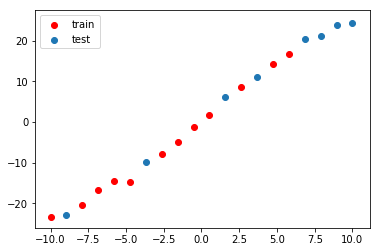

In [367]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( x_data,
                                                  y_data,
                                                  test_size = 0.40,
                                                  random_state = 100 )

plt.figure(figsize=(6, 4))
plt.scatter(train_X, train_y, c='r', label='train')
plt.scatter(test_X, test_y, label='test')
plt.legend()
plt.show()

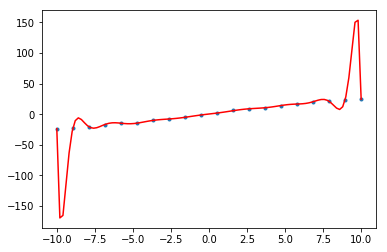

In [372]:
z = np.polyfit(x_data, y_data, 17)
p = np.poly1d(z)
xp = np.linspace(-10, 10, 100)
plt.plot(x_data, y_data, '.', xp, p(xp), '-r')
plt.show()

In [378]:
import pandas as pd
emp = pd.DataFrame( columns = ["x","y","pred"] )

for i in range( 1, num ):
    z = np.polyfit(x_data, y_data, 13)
    p = np.poly1d(z)
    x = round(x_data[i],1)
    emp.loc[i-1] = [ x, 
                    round(y_data[i],1), 
                    round(p(x),1) ]
    
emp.head()

,x,y,pred
0,-8.9,-23.0,-23.0
1,-7.9,-20.3,-20.4
2,-6.8,-16.7,-16.4
3,-5.8,-14.5,-15.2
4,-4.7,-14.7,-13.6


In [199]:
from sklearn import metrics
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )


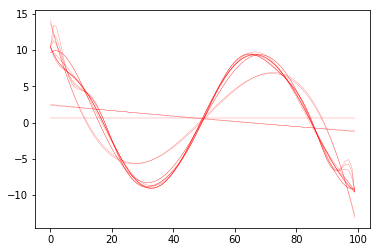

In [192]:
xp = np.linspace(-5, 5, 100)
for i in range( 0, 15 ):
    z = np.polyfit(x_data, y_data, i)
    p = np.poly1d(z)
    plt.plot(p(xp), '-r', lw=0.2)
plt.show()

In [193]:
import pandas as pd
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

In [194]:
for i in range( 1, 5 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( train_y, np.polyval( p, train_X ) ),
                      get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [195]:
rmse_df.tail()

,degree,rmse_train,rmse_test
0,1.0,6.240544,8.124596
1,2.0,3.849496,20.481444
2,3.0,2.843669,5.232564
3,4.0,1.071722,39.401790


230952818897432.78


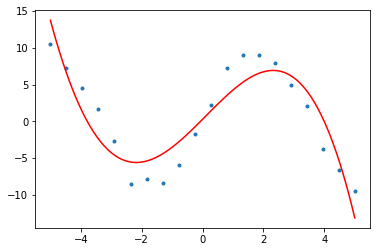

In [198]:
z = np.polyfit(x_data, y_data, 4)
p = np.poly1d(z)
xp = np.linspace(-5, 5, 100)
plt.plot(x_data, y_data, '.', xp, p(xp), '-r')
print np.polyval(y_data, 5) 
plt.show()

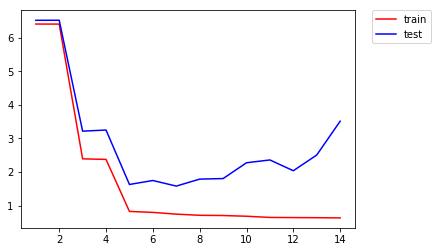

In [148]:

plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'b' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)
plt.show()